<a href="https://colab.research.google.com/github/AymanKUMA/yolov8_speech_bubbles_detection/blob/main/yolov8_speech_bubbles_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Feb 27 08:32:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="bMUemHSLyIJOJ3nDEUr2")
project = rf.workspace("ibn-zohr-university").project("speech-bubbles-detection")
dataset = project.version(9).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to speech-bubbles-detection-9 in yolov8:: 100%|██████████| 9144/9144 [00:03<00:00, 2565.31it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/speech-bubbles-detection-9/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa

In [8]:
!ls {HOME}/runs/detect/train2/

args.yaml					    train_batch22500.jpg
confusion_matrix.png				    train_batch22501.jpg
events.out.tfevents.1677487780.c1053cf50903.4784.0  train_batch22502.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


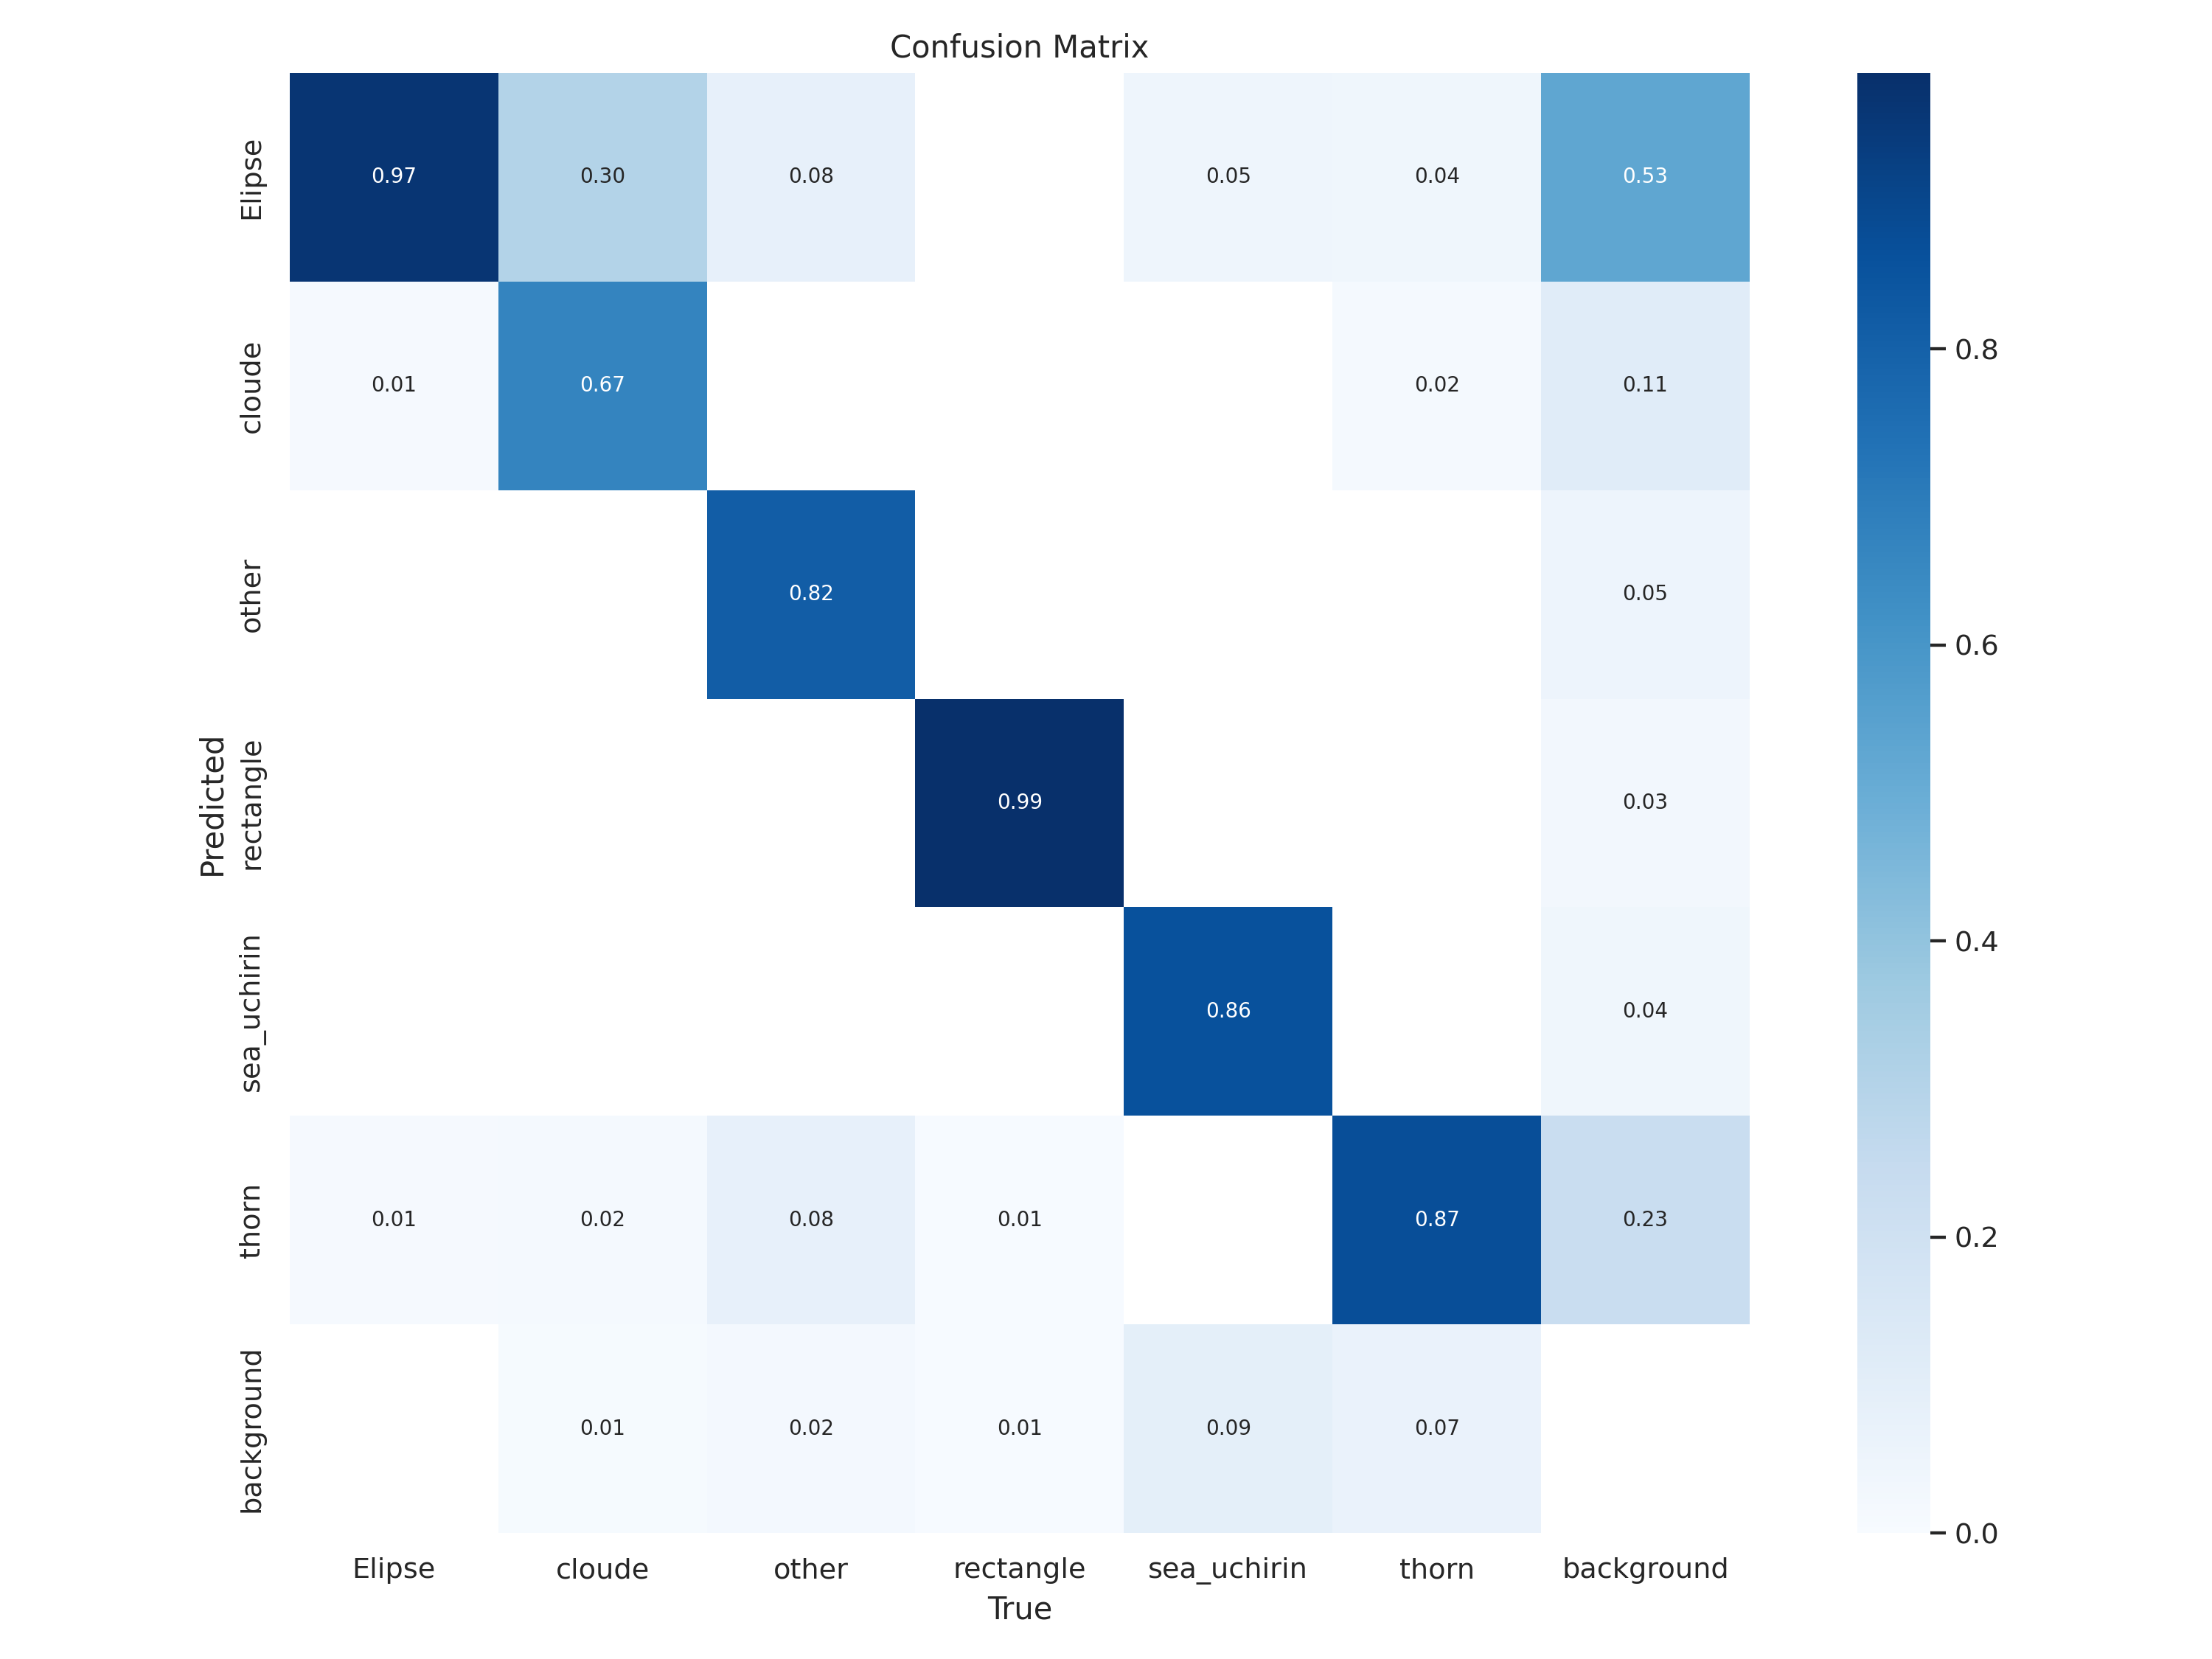

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


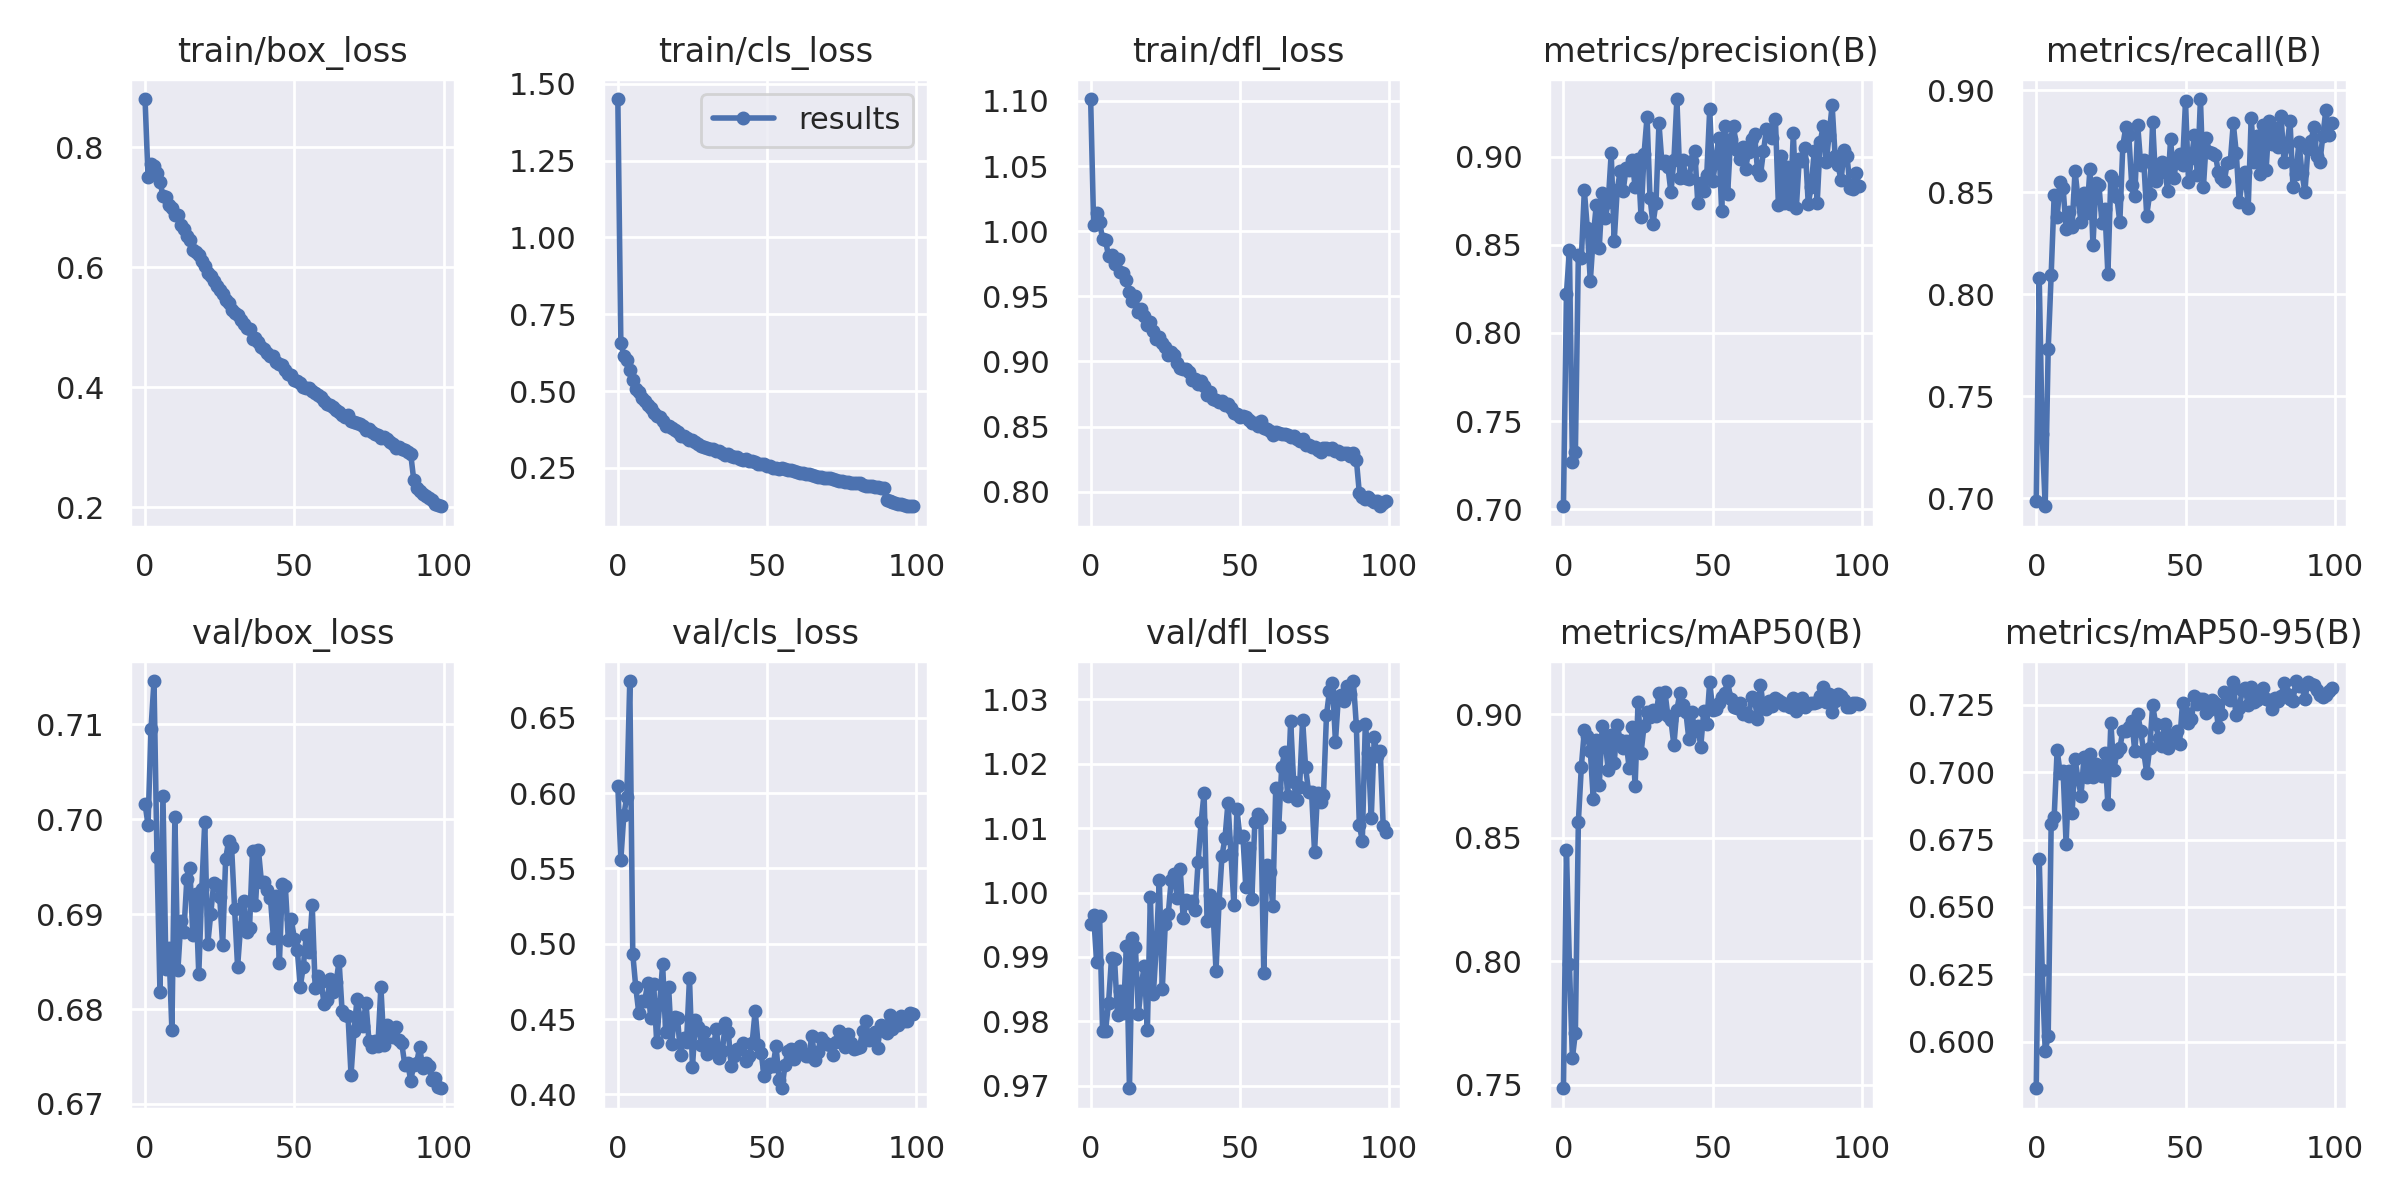

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


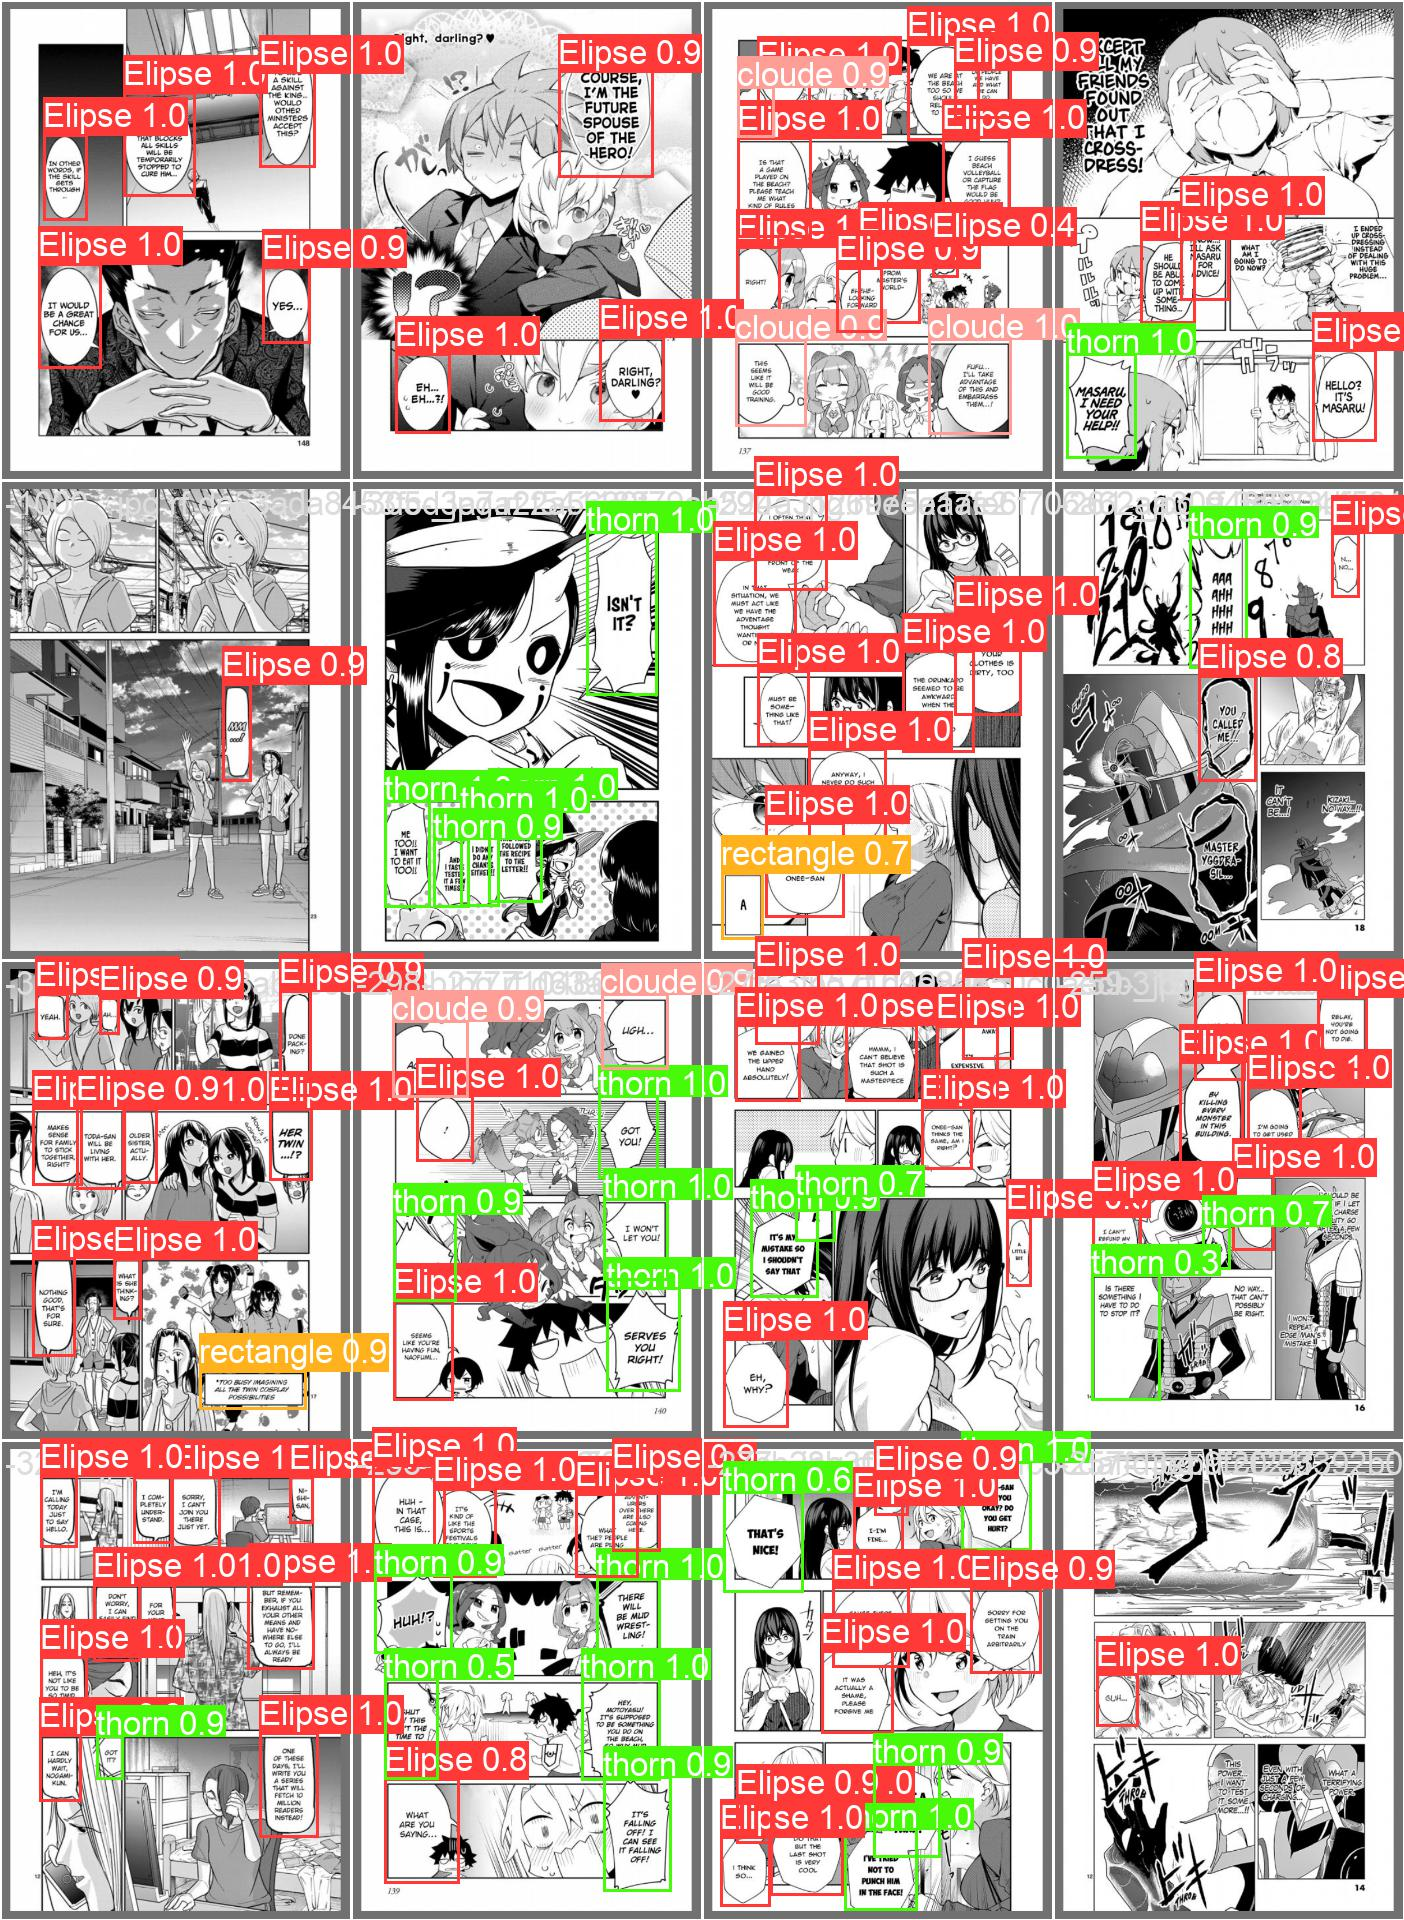

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/speech-bubbles-detection-9/valid/labels.cache... 376 images, 17 backgrounds, 0 corrupt: 100% 376/376 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 24/24 [00:10<00:00,  2.38it/s]
                   all        376       2503      0.916      0.859      0.911      0.734
                Elipse        376       1735      0.945      0.968      0.974      0.846
                cloude        376        187      0.836      0.674      0.808      0.663
                 other        376         49      0.899      0.816      0.869      0.678
             rectangle        376        147      0.999      0.986      0.995      0.854
           sea_uchirin        376         64      0.933       0.87       0.94      0.681
             

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/192 /content/datasets/speech-bubbles-detection-9/test/images/-1005-_jpg.rf.dc6e39110e1d5a9acc448bffc6214063.jpg: 800x576 4 Elipses, 1 cloude, 20.6ms
image 2/192 /content/datasets/speech-bubbles-detection-9/test/images/-102-_jpg.rf.cb09d351dbb55638d9dd03016abefda8.jpg: 800x576 6 Elipses, 2 thorns, 19.6ms
image 3/192 /content/datasets/speech-bubbles-detection-9/test/images/-1021-_jpg.rf.2a1e64cccd1476c87278d94f79d9e9d3.jpg: 800x576 1 Elipse, 4 cloudes, 19.6ms
image 4/192 /content/datasets/speech-bubbles-detection-9/test/images/-1022-_jpg.rf.1b882de78a6258b89241713ac23f9303.jpg: 800x576 3 Elipses, 1 cloude, 1 sea_uchirin, 19.5ms
image 5/192 /content/datasets/speech-bubbles-detection-9/test/images/-1033-_jpg.rf.d6420de5756ecdafb9199f79063c4d1c.jpg: 800x576 2 Elipses, 19.5ms
image 6/192 /content/datasets/spee

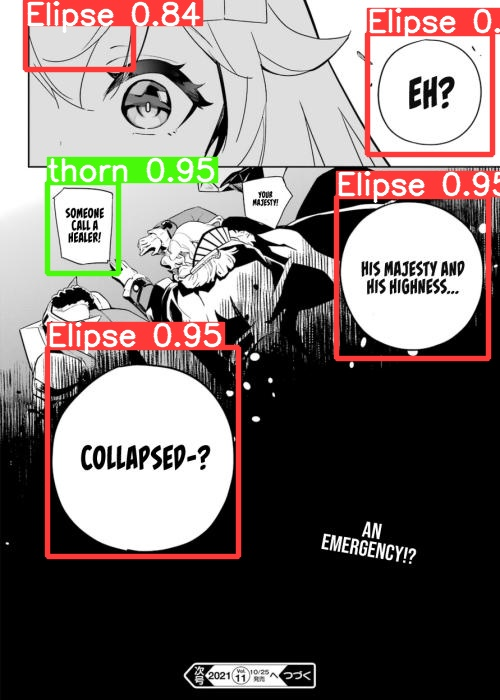

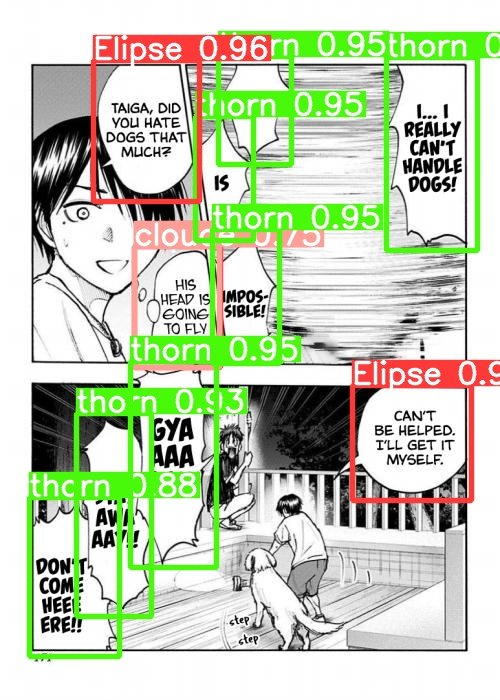

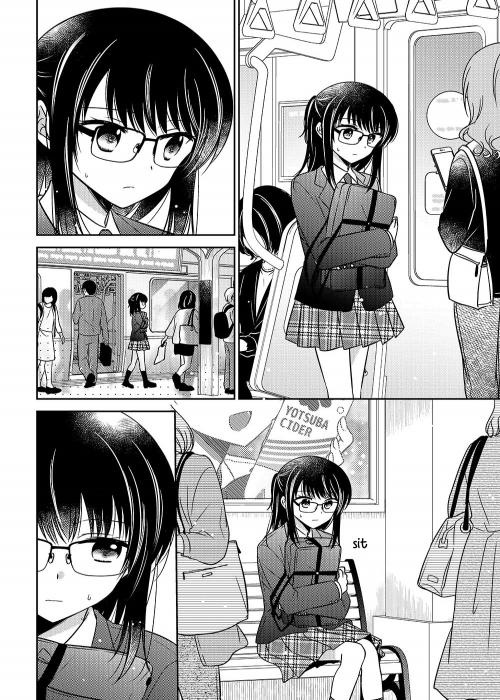

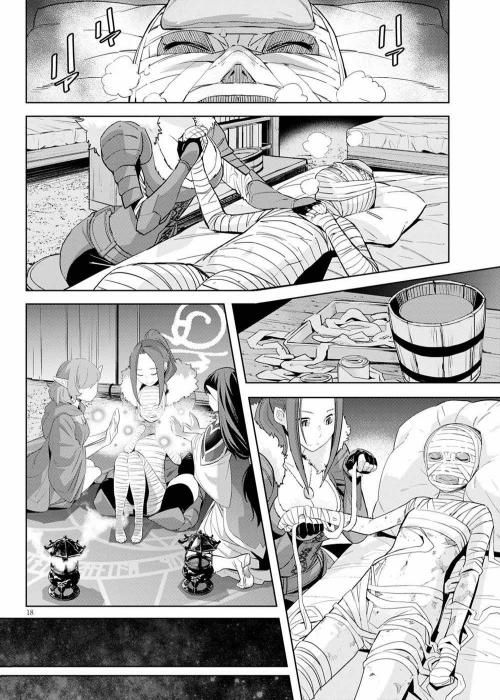

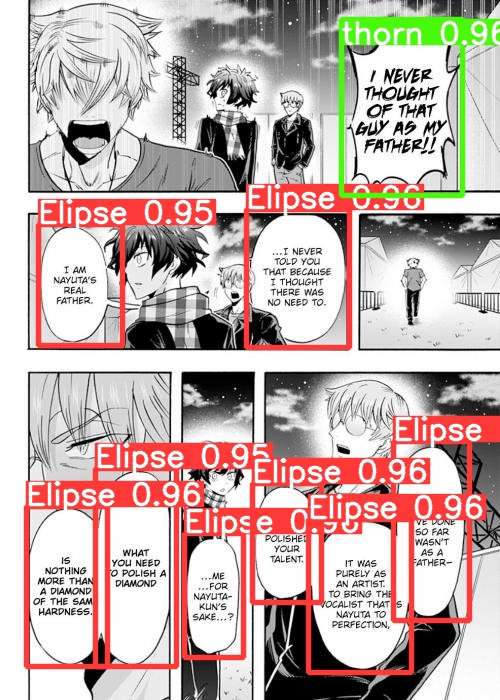

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[40:45]:
      display(Image(filename=image_path, width=500))
      print("\n")

In [16]:
!zip -r /content/results/results.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/-1352-_jpg.rf.609edc7bb70301464a87f5f5661151b0.jpg (deflated 4%)
  adding: content/runs/detect/predict/-1672-_jpg.rf.3faa2ddea5ac3e896b6a5d2c8704e972.jpg (deflated 6%)
  adding: content/runs/detect/predict/-1758-_jpg.rf.27aefa58cc9a425ce0fb9e17ee89d5a2.jpg (deflated 3%)
  adding: content/runs/detect/predict/-1312-_jpg.rf.e36799240657d7e6be04f06aeac1be11.jpg (deflated 5%)
  adding: content/runs/detect/predict/-797-_jpg.rf.36b01816e2e218b7233d61994d2cbc87.jpg (deflated 4%)
  adding: content/runs/detect/predict/-1034-_jpg.rf.01ddaeb11d0becc2cdb33565f029b1bb.jpg (deflated 5%)
  adding: content/runs/detect/predict/-1438-_jpg.rf.b8b3878caf8d8db66d1e488ea7d2127b.jpg (deflated 5%)
  adding: content/runs/detect/predict/-1804-_jpg.rf.ce3704ee7a600b7d3de97e02dba8b341.jpg (deflated 5%)
  adding: content/runs/detect/predict/-1912-_jp